# Coronavirus Modeling

### Preprocessing

In [7]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [41]:
def extractP1():
    os.chdir("./finalCases/p1")
    files = glob.glob("*.txt")
    
    days = []
    inoc_rate = []
    
    for file in files:
        inoc_rate.append(float("." + file[4:6]))
        f = open(file, "r")
        days.append(int(f.readlines()[-2].split()[1]))
    
    os.chdir("../..")
    
    return inoc_rate, days

def extractP3():
    os.chdir("./finalCases/p3")
    files = glob.glob("*.txt")
    
    sd = {}
    for file in files:
        f = open(file, "r")
        di = file[2:].rstrip('.txt')
        sd[di] = []
        for i, line in enumerate(f.readlines()):
            if i == 0 or line == "":
                continue
            sd[di].append(int(line.split()[4]))
            
    os.chdir("../..")
    
    return sd

<br>
<br>
<br>

## Part 1

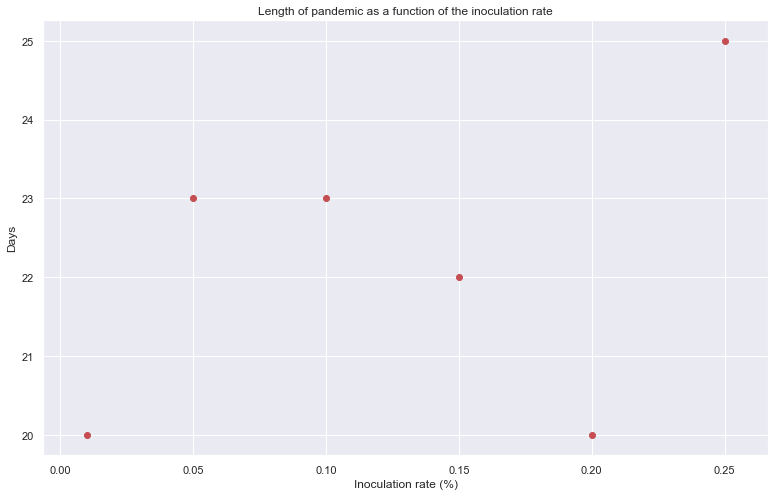

In [38]:
inoc_rate, days = extractP1()

plt.figure(figsize = (13, 8))
plt.scatter(inoc_rate, days, c = 'r')
plt.title("Length of pandemic as a function of the inoculation rate")
plt.xlabel("Inoculation rate (%)")
plt.ylabel("Days")
plt.show()

Generally speaking, as the inoculation rate goes up, the length of the pandemic goes down (with fixed daily interactions and transmission rates). The inoculation rates of 0.01 and 0.25 seem to be outliers here, likely because of interactions within the model. Changing the fixed parameters (which are 20 daily interactions and 0.05 transmission rate, in this case) could likely sort this out.

## Part 2

For this part, no concrete calculations can be done since it would require some complex mathematical functions to be involved. Instead, we'll simply get some descriptive statistics from the data and demonstrate that herd immunity is a tangible phenomenon. The following descriptions are from a population of 5000, each interacting with 20 people per day.
<br>

At an infection rate of 0.03:
- With 1% daily inoculation, 2726 (54.52%) got sick, 1723 were inoculated, and 551 were left susceptible.
- With 4% daily inoculation, 181 (3.62%) got sick, 4199 were inoculated, and 620 were left susceptible.
- With 7% daily inoculation, 1 (0.02%) got sick, 952 were inoculated, and 4048 were left susceptible.
- Using linear interpolation, we can expect that at an inoculation rate of 3.98%, 95% of the population will be left untouched.

At an infection rate of 0.05:
- With 1% daily inoculation, 3769 (75.38%) got sick, 1146 were inoculated, and 85 were left susceptible.
- With 4% daily inoculation, 1240 (24.80%) got sick, 3522 were inoculated, and 238 were left susceptible.
- With 7% daily inoculation, 327 (6.54%) got sick, 4510 were inoculated, and 163 were left susceptible.
- Using linear interpolation, we can expect that at an inoculation rate of 7.13%, 95% of the population will be left untouched.

At an infection rate of 0.07:
- With 1% daily inoculation, 4159 (83.18%) got sick, 831 were inoculated, and 10 were left susceptible.
- With 4% daily inoculation, 2167 (43.34%) got sick, 2788 were inoculated, and 45 were left susceptible.
- With 7% daily inoculation, 999 (19.98%) got sick, 3937 were inoculated, and 64 were left susceptible.
- Using linear interpolation, we can expect that at an inoculation rate of 8.42%, 95% of the population will be left untouched.

<br>
Clearly, as the inoculation rate went up (no matter the rate of infection), an increasing number of people were left susceptible (from a lack of inoculation) despite the virus running its course. This demonstrates the idea of herd immunity.

## Part 3

In [45]:
sd = extractP3()

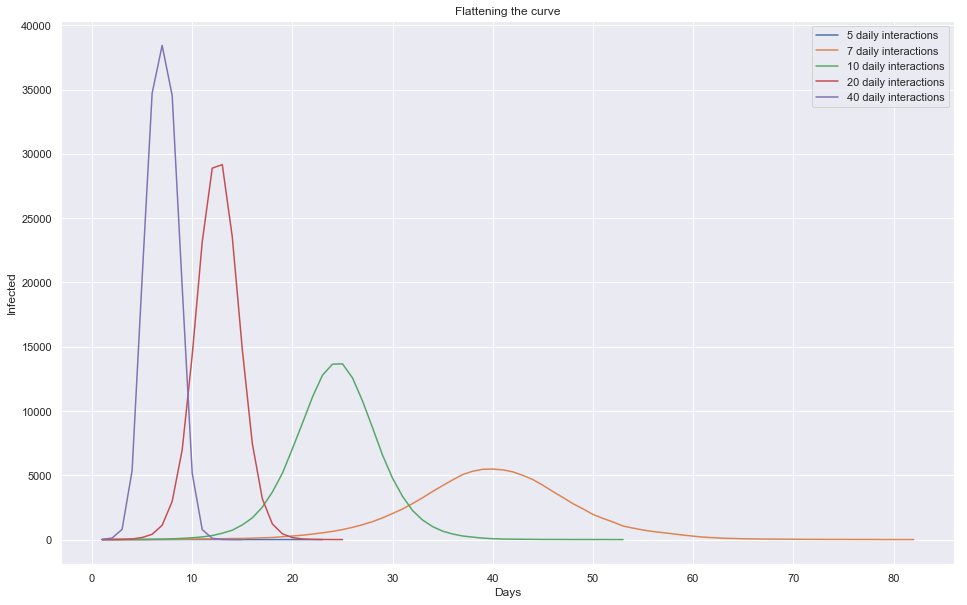

In [48]:
plt.figure(figsize = (16, 10))
for rate, vals in sd.items():
    plt.plot([x + 1 for x in range(len(vals))], vals, label = rate + " daily interactions")
    
plt.legend()
plt.title("Flattening the curve")
plt.xlabel("Days")
plt.ylabel("Infected")
plt.show()

Just to show that flattening the curve is beneficial, here are some statistics:

For 40 daily interactions: 
- 39,996 total people were infected
- 4 were left susceptible
- The peak occurred on day 7 with 38,433 cases

For 20 daily interactions:
- 39,527 total people were infected
- 473 were left susceptible
- The peak occurred on day 13 with 29,162 cases

For 10 daily interactions:
- 34,256 total people were infected
- 5,744 were left susceptible
- The peak occurred on day 25 with 13,666 cases

For 7 daily interactions:
- 25,306 total people were infected
- 14,694 were left susceptible
- The peak occurred on day 40 with 5,484 cases

For 5 daily interactions:
- 18 total people were infected
- 39,982 were left susceptible
- The peak occurred on day 12 with 8 cases

Although these numbers are likely inaccurate from a realistic standpoint, they clearly show that social distancing is effective. Getting rid of the virus is now just a matter of patience. :)